In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.listdir()

['ExploringData.ipynb',
 '.DS_Store',
 'readme.md',
 '.gitignore',
 'Figures',
 'test.txt',
 '.ipynb_checkpoints',
 'PreprocessData.ipynb',
 '.git',
 'Data']

In [4]:
basedir = os.getcwd()
datadir = basedir + '/Data'

print(basedir)
print(datadir)

/Users/atang2/Documents/Alice Tang/Research/ai4all_2021project/microbiomeproject
/Users/atang2/Documents/Alice Tang/Research/ai4all_2021project/microbiomeproject/Data


In [5]:
os.listdir(datadir)

['otu_annotation.csv',
 '.DS_Store',
 'microbiome_data.csv',
 'sample_desc_deid.csv']

In [6]:
data = pd.read_csv(datadir + '/microbiome_data.csv', index_col = 0)
OTUref = pd.read_csv(datadir + '/otu_annotation.csv', index_col = 0)
patients_assay = pd.read_csv(datadir +'/sample_desc_deid.csv', index_col = 0)

In [7]:
patients_assay.columns

Index(['BarcodeSequence', 'LinkerPrimerSequence', 'BodySite', 'SubjectID',
       'GestDayColl', 'GestWeekColl', 'TrimColl', 'intra_ut_fetal_demise',
       'History_of_preterm_delivery', 'Withdrew', 'Gdwithdrawal',
       'GWwithdrawal', 'Delivered', 'GestDayDel', 'GestWeekdel',
       'Labor_Initiation', 'Indication', 'PPROM', 'Chorioamnionitis',
       'Endometritis', 'Hypertensive Disorder', 'Preeclampsia',
       'Birthweight_kg', 'Length_at_birth', 'Number_of_babies', 'Race',
       'Ethnicity', 'ReversePrimer', 'Saliva_volume_uL',
       'Note_any_concerns_regarding_the_specimen', 'Run_No',
       'Number_within_run', 'Bead_Beating_Time', 'Description'],
      dtype='object')

In [8]:
patients_assay.head()

,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,...,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,1,NaN,1
1000501278,AACTCGTCGATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10005,188.0,27.0,3.0,F,0.0,F,...,1.0,Asian-Japanese,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Specimen log not provided,run001,2,NaN,2
1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,3,NaN,3
1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,4,NaN,4
1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,5,NaN,5


In [9]:
mask = patients_assay['BodySite']=='Vaginal_Swab'
patients_assay[mask]

,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,...,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,1,NaN,1
1000501278,AACTCGTCGATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10005,188.0,27.0,3.0,F,0.0,F,...,1.0,Asian-Japanese,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Specimen log not provided,run001,2,NaN,2
1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,3,NaN,3
1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,4,NaN,4
1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,5,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004701358.rs,AGAGAGCAAGTG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10047,245.0,35.0,3.0,F,0.0,F,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,64,NaN,4175
1004601068.rs,AGAGCAAGAGCA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10046,45.0,7.0,1.0,F,0.0,F,...,1.0,Other (Specify below),Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,65,NaN,4176
1004601228.rs,AGAGTAGCTAAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10046,155.0,23.0,2.0,F,0.0,F,...,1.0,Other (Specify below),Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,66,NaN,4177


In [10]:
mask2 = patients_assay['SubjectID']!='mock'
df = patients_assay[mask]

In [11]:
data

,1001360178,1000106028,1000160068,1001406208,1000606198,1000105048,1000603178,1000601248,1000860248,1000101018,...,1005503278.rs,1004302338.rs,1900701418.rs,1004704138.rs,1004602368.rs,NTC52,1002101188.rs,1000101168.rs,NTC51,1002204158.rs
OTUId,,,,,,,,,,,,,,,,,,,,,
OTU_25,1152,306,459,586,1468,3,1,0,1245,0,...,0,4,0,0,0,0,0,0,0,0
OTU_38,367,1091,727,328,58,29,0,2,15,0,...,0,0,0,0,0,0,0,0,0,0
OTU_233,0,0,0,959,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_962,55,20,17,32,71,0,0,0,67,0,...,0,0,0,0,0,0,0,0,0,0
OTU_168,0,0,0,0,0,24,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_1764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_1854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU_1803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


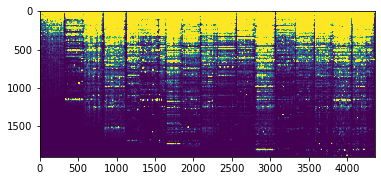

In [13]:
plt.imshow(data, vmax = 1)

In [13]:
patients_assay['Race'].value_counts()

White                    2694
Other (Specify below)     557
American Indian           194
Asian-Chinese             151
Pacific Islander          139
Indian                    122
Black                     120
Asian-Unspecified         120
Asian-Japanese             40
Name: Race, dtype: int64

In [17]:
patients_assay['SubjectID'].nunique()

51

In [18]:
patients_assay['SubjectID'].value_counts()

mock     213
10101    206
10023    166
10039    160
10022    156
10028    155
10046    153
10032    152
10034    151
10006    146
10044    139
10045    138
10018    137
10043    134
10047    130
19005    128
10040    122
10014    120
10021    117
10031    116
10001    115
10024    110
19004    108
10036     99
10025     98
10013     90
10008     89
10055     85
10020     60
10003     53
NTC       52
10029     52
19007     45
10009     43
10017     42
19006     41
10005     40
10002     40
19009     38
10004     27
10007     26
19010     21
10016     19
10027     18
10012     16
19008     14
10015      7
10010      6
19003      4
10011      4
10035      1
Name: SubjectID, dtype: int64

In [23]:
patients_assay['BodySite'].value_counts()

Vaginal_Swab          1072
Saliva                1033
Tooth_Gum              976
Stool                  887
mock                   213
NTC                     52
Back_of_ear_L           51
Urine                   34
Back_of_ear_R           34
Elbow_crease_R          29
Cord Blood (Serum)      21
Name: BodySite, dtype: int64

/Users/atang2/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


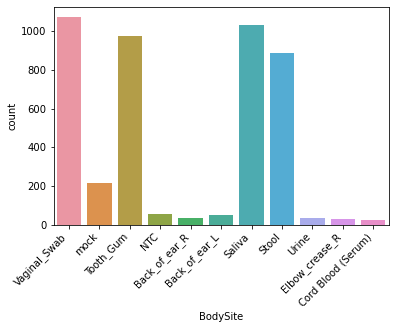

In [24]:
sns.countplot(patients_assay['BodySite'])
plt.xticks(rotation = 45, ha = 'right')
plt.savefig(basedir + '/Figures/bodysite.png', bbox_inches="tight")

<AxesSubplot:>

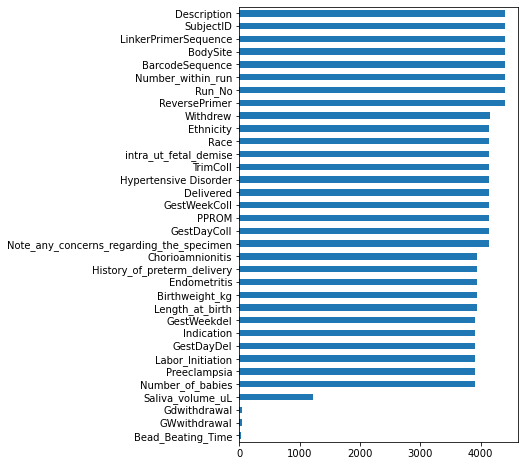

In [30]:
plt.figure(figsize = (5,8))
colcount = patients_assay.count().sort_values()
colcount.plot(kind = "barh") 

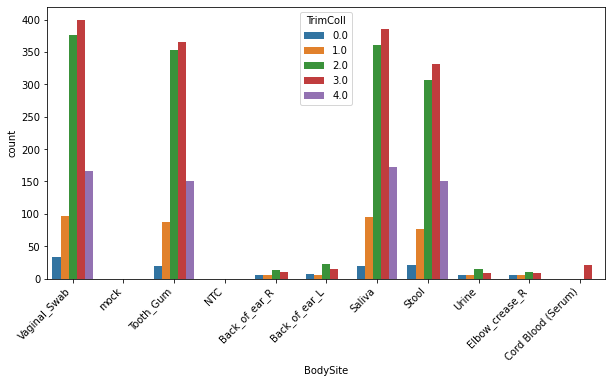

In [41]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'BodySite', hue = 'TrimColl', data = patients_assay)
plt.xticks(rotation = 45, ha = 'right');

In [ ]:
# perform encodings


In [52]:
(data.T != 0).sum().sort_values()

OTUId
OTU_1382       1
OTU_1853       1
OTU_1729       1
OTU_1610       1
OTU_1473       1
            ... 
OTU_900     2146
OTU_6       2179
OTU_11      2225
OTU_7       2391
OTU_1       2639
Length: 1896, dtype: int64

In [63]:
patients_assay

,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,...,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,1,NaN,1
1000501278,AACTCGTCGATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10005,188.0,27.0,3.0,F,0.0,F,...,1.0,Asian-Japanese,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Specimen log not provided,run001,2,NaN,2
1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,3,NaN,3
1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,F,...,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,4,NaN,4
1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,T,...,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,5,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010104488.rs,GTCTGACAGTTG,GCACTCCTACGGGAGGCAGCA,Tooth_Gum,10101,311.0,45.0,4.0,F,1.0,F,...,1.0,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,287,NaN,4398
1002402218.ca2.rs,GTCTGGATAGCG,GCACTCCTACGGGAGGCAGCA,Stool,10024,150.0,22.0,2.0,F,0.0,F,...,1.0,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,288,15 min,4399
1002302248.bn1.rs,GTCTTCGTCGCT,GCACTCCTACGGGAGGCAGCA,Stool,10023,169.0,25.0,2.0,F,0.0,F,...,1.0,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,289,15 min,4400


In [ ]:
data = data.T

In [70]:
fulldata = patients_assay.merge(data, right_index= True, left_index = True)

In [65]:
OTUref

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUId,,,,,,,
OTU_25,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
OTU_38,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,epidermidis
OTU_233,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
OTU_962,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
OTU_168,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,NaN
...,...,...,...,...,...,...,...
OTU_1764,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,0319-6G20,NaN,NaN
OTU_1854,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN
OTU_1803,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,NaN


In [ ]:
# data cleaning = filter out bad stuff, keep stuff you want, manipulate the data

In [78]:
patients_assay['GestDayColl']

#SampleID
1000201108            81.0
1000501278           188.0
1000101018           -73.0
1000101028           -65.0
1000201118            86.0
                     ...  
1010104488.rs        311.0
1002402218.ca2.rs    150.0
1002302248.bn1.rs    169.0
1002102208.ak2.rs    139.0
NTC52.rs               NaN
Name: GestDayColl, Length: 4402, dtype: float64

In [80]:
patients_assay['TrimColl'].value_counts()

3.0    1546
2.0    1457
4.0     640
1.0     376
0.0     118
Name: TrimColl, dtype: int64

In [87]:
patients_assay['History_of_preterm_delivery'].count()

3933

In [90]:
patients_assay['History_of_preterm_delivery'].fillna(0).value_counts()

0.0    3350
1.0    1052
Name: History_of_preterm_delivery, dtype: int64

In [93]:
patients_assay['Race'].value_counts()

White                    2694
Other (Specify below)     557
American Indian           194
Asian-Chinese             151
Pacific Islander          139
Indian                    122
Black                     120
Asian-Unspecified         120
Asian-Japanese             40
Name: Race, dtype: int64

In [102]:
encodingmap = {'White': 1, 'Other (Specify below)': 5}

In [104]:
patients_assay['Race'].map(encodingmap).value_counts()

1.0    2694
5.0     557
Name: Race, dtype: int64

In [105]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

In [110]:
fulldata['newfeature'] = data.sum(axis=1)

In [111]:
fulldata

,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,...,OTU_1630,OTU_1678,OTU_1685,OTU_1628,OTU_1764,OTU_1854,OTU_1803,OTU_1593,OTU_1382,newfeature
1000001010,ACAGTGCTTCAT,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,130
1000001020,ACGCTATCTGGA,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,21
1000001030,ACTGACAGCCAT,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,141
1000001040,AGCACACCTACA,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,27
1000001050,ACAGTGCTTCAT,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NTC9,TAGTGTGCTTCA,GCACTCCTACGGGAGGCAGCA,NTC,NTC,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,131
mock1,GATGTGAGCGCT,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,722
mock2,GCACTGAGACGT,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,335
mock3,GCAGTTCATATC,GCACTCCTACGGGAGGCAGCA,mock,mock,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,89


In [ ]:
# data encoding, imputation
Nans -- imputation: do you want to replace NAN? do you want to represent it as a separate feature?
    
encoding categorical variables:
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
    
# feature engineering
creating new features

In [ ]:
# networks
networkx is a package 
export as nodes and edges --> make graphs or visulizations 
    R has visNetwork
    Other packages?

In [113]:
fulldata.columns

Index(['BarcodeSequence', 'LinkerPrimerSequence', 'BodySite', 'SubjectID',
       'GestDayColl', 'GestWeekColl', 'TrimColl', 'intra_ut_fetal_demise',
       'History_of_preterm_delivery', 'Withdrew',
       ...
       'OTU_1630', 'OTU_1678', 'OTU_1685', 'OTU_1628', 'OTU_1764', 'OTU_1854',
       'OTU_1803', 'OTU_1593', 'OTU_1382', 'newfeature'],
      dtype='object', length=1931)

In [118]:
# Machine learning
X = fulldata[['OTU_1630','OTU_1678','OTU_1685']].to_numpy()
y = fulldata['intra_ut_fetal_demise'].fillna(0)


In [116]:
X # column is feature
# row is sample

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [119]:
y # outcome to predict

1000001010    0
1000001020    0
1000001030    0
1000001040    0
1000001050    0
             ..
NTC9          0
mock1         0
mock2         0
mock3         0
mock4         0
Name: intra_ut_fetal_demise, Length: 4354, dtype: object

In [ ]:
# unsupervised learning -- ignore y
https://scikit-learn.org/stable/unsupervised_learning.html
dimensionality reduction
clustering

In [120]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [125]:
y_predict = kmeans.predict(X)

In [ ]:
# supervised learning
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning


In [129]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [130]:
reg.fit(X, y)

ValueError: could not convert string to float: 'T'